## &#128187; Homework #1 (Regression) 

-------------------------------------------------------------------------------------
### 	&#10004; Index
#### 1. Lasso Regression and Ridge regression
#### 2. Hyperparameters
#### 3. Training and Testing the model
-------------------------------------------------------------------------------------

#### 1. Lasso regression and Ridge regression

In this step, we will implement Lasso regression and Ridge regression without using the regression library (Scikit-Learn). Regression contains GD and loss function for each regression.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(123)

In [2]:
class Regression():
  def __init__(self, regularization_weight, ridge):
    # When regularization_weight (or lambda) is equal to 0, the model becomes a linear model
    self.reg = regularization_weight
    self.ridge = ridge
  # Function for training
  def fit(self, X, Y, epochs, learning_rate):
    X_bar = np.insert(X, 0, 1, axis=1)
    num_examples, num_features = X_bar.shape
    # Init weights and biases
    self.W = np.zeros(num_features)

    # List for recording losses during training
    self.train_loss = []
    
    # Variable that supports training with Gradient Descent 
    for ep in range( epochs ):
      # Get gradients
      dW = self.calculate_gradient(X_bar, Y)
      # Update weights
      self.W = self.W - learning_rate * dW
      # Record the loss per epoch
      loss = self.calculate_loss(X_bar, Y)
      self.train_loss.append(loss)

  # Function for prediction
  def predict(self, X):
    return np.dot(X, self.W)

  # Function for calculating the gradient
  def calculate_gradient(self, X, Y):
    num_examples = X.shape[0]
    # Get predictions
    pred = self.predict(X)
    # Calculate gradients
    if self.ridge:
      regularization_term = 2 * self.reg * self.W 
    else:
      regularization_term = self.reg * np.sign(self.W)
    dW = np.dot(X.T, (pred - Y))/ num_examples + regularization_term
    return dW

  # Function for calculating the loss
  def calculate_loss(self, X, Y):
    num_examples = X.shape[0]
    # Get predictions
    pred = self.predict(X)
    # Calculate loss
    if self.ridge:
      regularization_term = self.reg * np.sum(np.square(self.W))
    else:
      regularization_term = self.reg * np.sum(np.abs(self.W))
    loss = np.sum(np.square(pred - Y)) / (2 * num_examples)  + regularization_term
    return loss

  # Function for evaluation
  # Metric: Root Mean Square Error (RMSE)
  def eval(self, X, Y):
    X_bar = np.insert(X, 0, 1, axis=1)
    num_examples = X_bar.shape[0]
    # Get predictions
    Y_pred = self.predict(X_bar)
    # Calcuate RMSE
    RMSE = np.sqrt(np.sum(np.square(Y_pred - Y)) / num_examples)
    return RMSE

In [3]:
# Generate data with gaussian noise
X = np.random.uniform(-10.0, 10.0, (10000,2))
W = np.random.uniform(-1.0, 1.0, 2)
b = np.random.uniform(-1.0,1.0, 1)
Y = np.dot(X, W) + b + np.random.normal(0,1,10000)

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=35 )
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=35)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(5600, 2) (1400, 2) (3000, 2) (5600,) (1400,) (3000,)


#### 2. Hyperparameters
Train the models with different regularization factors, and learning rates. By comparing the loss between each model, we will see the importance of hyperparameters

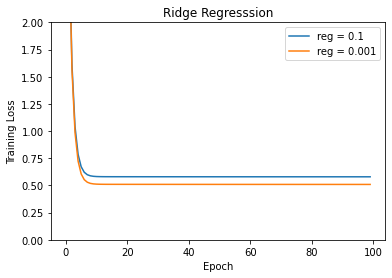

Root Mean Square Error (Validation)
reg = 0.1: 1.022682002116763
reg = 0.001: 1.020572637756531


In [5]:
# Init
ridge_model_1 = Regression(0.1, True)
ridge_model_2 = Regression(0.001, True)

# Train 
epochs = 100
learning_rate = 0.01

ridge_model_1.fit( X_train, Y_train, epochs, learning_rate)
ridge_model_2.fit( X_train, Y_train, epochs, learning_rate)

# Plot loss graph
loss_1, loss_2 = ridge_model_1.train_loss, ridge_model_2.train_loss

x_axis = np.arange(0, len(loss_1))
plt.plot(x_axis, loss_1, label='reg = 0.1')
plt.plot(x_axis, loss_2, label='reg = 0.001')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.ylim(0,2)
plt.title('Ridge Regresssion')
plt.legend()
plt.show()

# Evaluate
rmse_1, rmse_2 = ridge_model_1.eval( X_val, Y_val ), ridge_model_2.eval( X_val, Y_val )
print("Root Mean Square Error (Validation)")
print(f"reg = 0.1: {rmse_1}\nreg = 0.001: {rmse_2}")

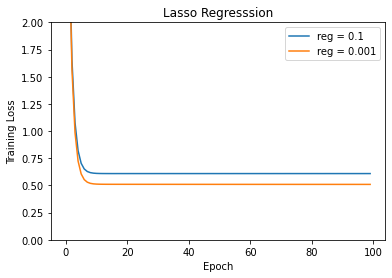

Root Mean Square Error (Validation)
reg = 0.1: 1.0244019730663128
reg = 0.001: 1.0206026788912874


In [6]:
# Init
lasso_model_1 = Regression(0.1, False)
lasso_model_2 = Regression(0.001, False)

# Train 
epochs = 100
learning_rate = 0.01

lasso_model_1.fit( X_train, Y_train, epochs, learning_rate)
lasso_model_2.fit( X_train, Y_train, epochs, learning_rate)

# Plot loss graph
loss_1, loss_2 = lasso_model_1.train_loss, lasso_model_2.train_loss

x_axis = np.arange(0, len(loss_1))
plt.plot(x_axis, loss_1, label='reg = 0.1')
plt.plot(x_axis, loss_2, label='reg = 0.001')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.ylim(0,2)
plt.title('Lasso Regresssion')
plt.legend()
plt.show()

# Evaluate
rmse_1, rmse_2 = lasso_model_1.eval( X_val, Y_val ), lasso_model_2.eval( X_val, Y_val )
print("Root Mean Square Error (Validation)")
print(f"reg = 0.1: {rmse_1}\nreg = 0.001: {rmse_2}")

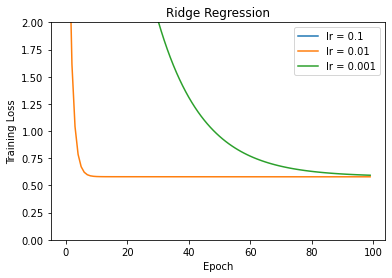

Root Mean Square Error (Validation)
lr = 0.1: 7.464865842454927e+37
lr = 0.01: 1.022682002116763
lr = 0.001: 1.0509413104411203


In [7]:
# Init
model = Regression(0.1, True)

# Train 
epochs = 100

learning_rate = 0.1
model.fit(X_train, Y_train, epochs, learning_rate)
loss_1 = model.train_loss
rmse_1 = model.eval(X_val, Y_val)

learning_rate = 0.01
model.fit(X_train, Y_train, epochs, learning_rate)
loss_2 = model.train_loss
rmse_2 = model.eval(X_val, Y_val)

learning_rate = 0.001
model.fit(X_train, Y_train, epochs, learning_rate)
loss_3 = model.train_loss
rmse_3 = model.eval(X_val, Y_val)

# Plot loss graph
x_axis = np.arange(0, len(loss_1))
plt.plot(x_axis, loss_1, label='lr = 0.1')
plt.plot(x_axis, loss_2, label='lr = 0.01')
plt.plot(x_axis, loss_3, label='lr = 0.001')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.ylim(0,2)
plt.title('Ridge Regression')
plt.legend()
plt.show()

# Evaluate
print("Root Mean Square Error (Validation)")
print(f"lr = 0.1: {rmse_1}\nlr = 0.01: {rmse_2}\nlr = 0.001: {rmse_3}")

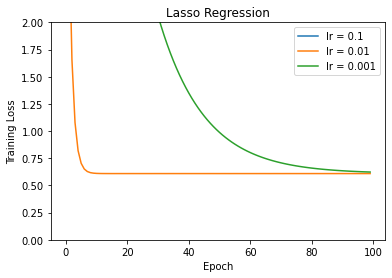

Root Mean Square Error (Validation)
lr = 0.1: 3.2402652835057433e+37
lr = 0.01: 1.0244019730663128
lr = 0.001: 1.0502434503799667


In [8]:
# Init
model = Regression(0.1, False)

# Train 
epochs = 100

learning_rate = 0.1
model.fit(X_train, Y_train, epochs, learning_rate)
loss_1 = model.train_loss
rmse_1 = model.eval(X_val, Y_val)

learning_rate = 0.01
model.fit(X_train, Y_train, epochs, learning_rate)
loss_2 = model.train_loss
rmse_2 = model.eval(X_val, Y_val)

learning_rate = 0.001
model.fit(X_train, Y_train, epochs, learning_rate)
loss_3 = model.train_loss
rmse_3 = model.eval(X_val, Y_val)

# Plot loss graph
x_axis = np.arange(0, len(loss_1))
plt.plot(x_axis, loss_1, label='lr = 0.1')
plt.plot(x_axis, loss_2, label='lr = 0.01')
plt.plot(x_axis, loss_3, label='lr = 0.001')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.ylim(0,2)
plt.title('Lasso Regression')
plt.legend()
plt.show()

# Evaluate
print("Root Mean Square Error (Validation)")
print(f"lr = 0.1: {rmse_1}\nlr = 0.01: {rmse_2}\nlr = 0.001: {rmse_3}")

#### 3. Training and Testing the model

Train each model on the given dataset using the hyperparameters obtained in the previous step, and evaluate the model by root mean square error (RMSE).

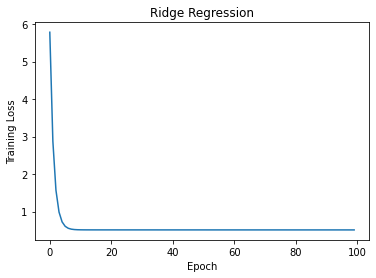

Root Mean Square Error (Test):  1.0043191319477995


In [9]:
# Init
regularization_weight = 0.001
ridge_model = Regression(regularization_weight, True)

# Train 
epochs = 100
learning_rate = 0.01
ridge_model.fit( X_train, Y_train, epochs, learning_rate)

# Plot loss graph
ridge_loss = ridge_model.train_loss
x_axis = np.arange(0, len(ridge_loss))
plt.plot(x_axis, ridge_loss, label='Ridge Regression')
plt.title('Ridge Regression')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

# Evaluate
print("Root Mean Square Error (Test): ", ridge_model.eval( X_test, Y_test ))

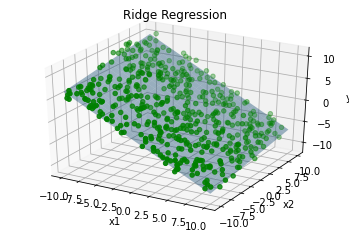

In [10]:
weight = ridge_model.W

# Plot test dataset 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:500,0], X_test[:500,1], Y_test[:500], color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

# Plot surface of Ridge regression
x_axis = np.tile(range(-10,11), (21,1))
y_axis = np.tile(range(-10,11), (21,1)).T
z_axis = x_axis * weight[1] + y_axis * weight[2] + weight[0]

ax.plot_surface(x_axis, y_axis, z_axis, alpha = 0.4)
plt.title('Ridge Regression')
plt.show()

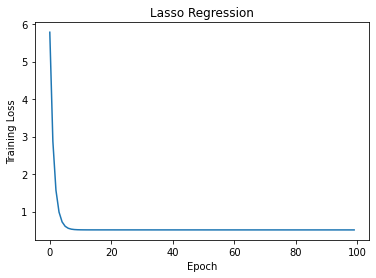

Root Mean Square Error (Test):  1.0043262459260391


In [11]:
# Init
regularization_weight = 0.001
lasso_model = Regression(regularization_weight, False)

# Train 
epochs = 100
learning_rate = 0.01
lasso_model.fit( X_train, Y_train, epochs, learning_rate)

# Plot loss graph
lasso_loss = lasso_model.train_loss
x_axis = np.arange(0, len(lasso_loss))
plt.plot(x_axis, lasso_loss, label='Lasso')
plt.title('Lasso Regression')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.show()

# Evaluate
print("Root Mean Square Error (Test): ", lasso_model.eval( X_test, Y_test ))

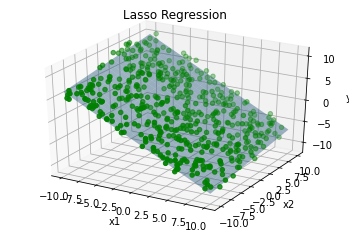

In [12]:
weight = lasso_model.W

# Plot test dataset 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:500,0], X_test[:500,1], Y_test[:500], color='green')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")

# Plot surface of Lasso regression
x_axis = np.tile(range(-10,11), (21,1))
y_axis = np.tile(range(-10,11), (21,1)).T
z_axis = x_axis * weight[1] + y_axis * weight[2] + weight[0]

ax.plot_surface(x_axis, y_axis, z_axis, alpha = 0.4)
plt.title('Lasso Regression')
plt.show()